In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.0.0


In [4]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [5]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
price       1000 non-null float64
feature1    1000 non-null float64
feature2    1000 non-null float64
dtypes: float64(3)
memory usage: 23.6 KB


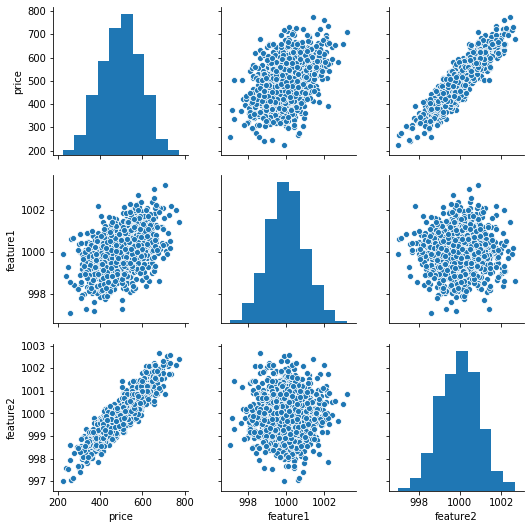

In [6]:
sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

In [16]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

In [8]:
X = df[['feature1','feature2']].values

In [9]:
y = df['price'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(700, 2)

In [12]:
X_test.shape

(300, 2)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
X_train = scaler.transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [23]:
X_train.max()

1.0

In [24]:
X_train.min()

0.0

## TensorFlow 2.0 Keras Syntax

In [25]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense,Activation

In [27]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

In [28]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:


In [29]:
#option 1 of building the sequential model
model = Sequential([Dense(4,activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)])

In [31]:
#option 2: more flexible to modify
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [34]:
model.fit(x=X_train,y=y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 2ms/sample - loss: 256758.0909
Epoch 2/250
700/700 [==============================] - 0s 89us/sample - loss: 256668.9116
Epoch 3/250
700/700 [==============================] - 0s 97us/sample - loss: 256589.3255
Epoch 4/250
700/700 [==============================] - 0s 93us/sample - loss: 256504.7092
Epoch 5/250
700/700 [==============================] - 0s 89us/sample - loss: 256414.2424
Epoch 6/250
700/700 [==============================] - 0s 86us/sample - loss: 256314.8452
Epoch 7/250
700/700 [==============================] - 0s 97us/sample - loss: 256204.5656
Epoch 8/250
700/700 [==============================] - 0s 94us/sample - loss: 256082.7471
Epoch 9/250
700/700 [==============================] - 0s 96us/sample - loss: 255947.5175
Epoch 10/250
700/700 [==============================] - 0s 97us/sample - loss: 255799.5416
Epoch 11/250
700/700 [==============================] - 0s 106us/sample - loss:

700/700 [==============================] - 0s 93us/sample - loss: 115695.7779
Epoch 91/250
700/700 [==============================] - 0s 91us/sample - loss: 111747.3012
Epoch 92/250
700/700 [==============================] - 0s 76us/sample - loss: 107755.9057
Epoch 93/250
700/700 [==============================] - 0s 74us/sample - loss: 103732.3046
Epoch 94/250
700/700 [==============================] - 0s 70us/sample - loss: 99713.9892
Epoch 95/250
700/700 [==============================] - 0s 70us/sample - loss: 95646.5837
Epoch 96/250
700/700 [==============================] - 0s 70us/sample - loss: 91570.0439
Epoch 97/250
700/700 [==============================] - 0s 74us/sample - loss: 87518.5079
Epoch 98/250
700/700 [==============================] - 0s 84us/sample - loss: 83438.5344
Epoch 99/250
700/700 [==============================] - 0s 77us/sample - loss: 79364.5054
Epoch 100/250
700/700 [==============================] - 0s 74us/sample - loss: 75309.7250
Epoch 101/250
700/

700/700 [==============================] - ETA: 0s - loss: 948.438 - 0s 113us/sample - loss: 931.8720
Epoch 181/250
700/700 [==============================] - 0s 110us/sample - loss: 914.8787
Epoch 182/250
700/700 [==============================] - 0s 97us/sample - loss: 898.1892
Epoch 183/250
700/700 [==============================] - 0s 91us/sample - loss: 881.3638
Epoch 184/250
700/700 [==============================] - 0s 90us/sample - loss: 864.1586
Epoch 185/250
700/700 [==============================] - 0s 91us/sample - loss: 847.2112
Epoch 186/250
700/700 [==============================] - 0s 90us/sample - loss: 832.2117
Epoch 187/250
700/700 [==============================] - 0s 91us/sample - loss: 815.4737
Epoch 188/250
700/700 [==============================] - 0s 95us/sample - loss: 799.6481
Epoch 189/250
700/700 [==============================] - 0s 91us/sample - loss: 782.3452
Epoch 190/250
700/700 [==============================] - 0s 97us/sample - loss: 767.5071
Epoch 1

In [35]:
loss_df = pd.DataFrame(model.history.history)

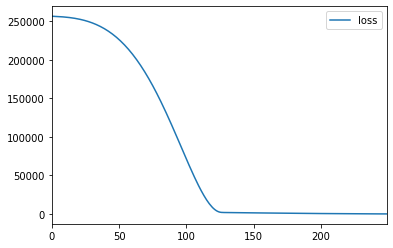

In [36]:
loss_df.plot()